<a href="https://colab.research.google.com/github/HamzaKotbAddin/Sentiment_Analysis/blob/main/Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Step 1: Upload the kaggle.json file
from google.colab import files
uploaded = files.upload()

# Step 2: Create the .kaggle directory if it doesn't exist
import os
kaggle_dir = '/root/.kaggle'
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)

# Step 3: Move the uploaded kaggle.json file to the correct location
import shutil
shutil.move("kaggle.json", os.path.join(kaggle_dir, "kaggle.json"))

# Step 4: Install Kaggle API client
!pip install kaggle

# Step 5: Set permissions for the Kaggle API key
!chmod 600 /root/.kaggle/kaggle.json


Saving kaggle.json to kaggle (2).json


In [34]:
# prompt: import pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

nltk.download('maxent_ne_chunker_tab')
nltk.download('words')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [9]:
# Install the Kaggle API client
!pip install kaggle

# Set permissions to the API key (already uploaded in /root/.kaggle)
!chmod 600 /root/.kaggle/kaggle.json

# Now you can download the dataset
!kaggle datasets download -d snap/amazon-fine-food-reviews


Dataset URL: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
License(s): CC0-1.0
100% 241M/242M [00:09<00:00, 28.3MB/s]
100% 242M/242M [00:09<00:00, 27.1MB/s]


In [10]:
import zipfile

# Unzip the downloaded file
with zipfile.ZipFile('amazon-fine-food-reviews.zip', 'r') as zip_ref:
    zip_ref.extractall('amazon-fine-food-reviews')

# List the extracted files
import os
os.listdir('amazon-fine-food-reviews')


['hashes.txt', 'Reviews.csv', 'database.sqlite']

In [13]:

# Example: Load the reviews dataset
df = pd.read_csv('amazon-fine-food-reviews/Reviews.csv')

# View the first few rows of the DataFrame
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


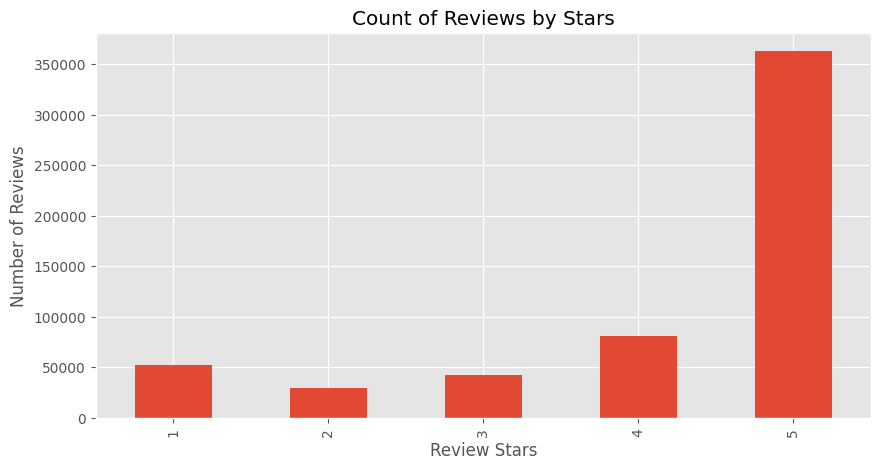

In [16]:
df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars', figsize=(10, 5))
plt.xlabel('Review Stars')
plt.ylabel('Number of Reviews')
plt.show()

In [37]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  got/VBD
  a/DT
  wild/JJ
  hair/NN
  for/IN
  taffy/NN
  and/CC
  ordered/VBD
  this/DT
  five/CD
  pound/NN
  bag/NN
  ./.
  The/DT
  taffy/NN
  was/VBD
  all/DT
  very/RB
  enjoyable/JJ
  with/IN
  many/JJ
  flavors/NNS
  :/:
  watermelon/NN
  ,/,
  root/NN
  beer/NN
  ,/,
  melon/NN
  ,/,
  peppermint/NN
  ,/,
  grape/NN
  ,/,
  etc/FW
  ./.
  My/PRP$
  only/JJ
  complaint/NN
  is/VBZ
  there/EX
  was/VBD
  a/DT
  bit/NN
  too/RB
  much/JJ
  red/black/NN
  licorice-flavored/JJ
  pieces/NNS
  (/(
  just/RB
  not/RB
  my/PRP$
  particular/JJ
  favorites/NNS
  )/)
  ./.
  Between/IN
  me/PRP
  ,/,
  my/PRP$
  kids/NNS
  ,/,
  and/CC
  my/PRP$
  husband/NN
  ,/,
  this/DT
  lasted/VBN
  only/RB
  two/CD
  weeks/NNS
  !/.
  I/PRP
  would/MD
  recommend/VB
  this/DT
  brand/NN
  of/IN
  taffy/NN
  --/:
  it/PRP
  was/VBD
  a/DT
  delightful/JJ
  treat/NN
  ./.)


In [17]:
example = df['Text'][5]
print(example)

I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.


In [25]:
nltk.word_tokenize(example)
tokens = nltk.word_tokenize(example)
tokens[:10]

['I', 'got', 'a', 'wild', 'hair', 'for', 'taffy', 'and', 'ordered', 'this']

In [30]:
tagged = nltk.pos_tag(tokens)
tagged[:10]


[('I', 'PRP'),
 ('got', 'VBD'),
 ('a', 'DT'),
 ('wild', 'JJ'),
 ('hair', 'NN'),
 ('for', 'IN'),
 ('taffy', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('this', 'DT')]